# Late-time evolution of nonlinear gravitational collapse by Burko & Ori
##  Geoff Cope
##  Univeristy of Utah
##  December 25, 2021

https://arxiv.org/abs/gr-qc/9703067

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
u,v,theta,phi,du,dv,dtheta,dphi = symbols('u v theta phi du dv dtheta dphi')

In [5]:
f = Function('f')(u,v)
f

In [6]:
r = Function('r')(u,v)
r

In [8]:
variables = Matrix([u,v,theta,phi])
variables

⎡u⎤
⎢ ⎥
⎢v⎥
⎢ ⎥
⎢θ⎥
⎢ ⎥
⎣φ⎦

In [9]:
differentials = Matrix( [du,dv,dtheta,dphi] ) 
differentials

⎡  du  ⎤
⎢      ⎥
⎢  dv  ⎥
⎢      ⎥
⎢dtheta⎥
⎢      ⎥
⎣ dphi ⎦

In [12]:
lineElement = expand(- f*du*dv + r**2 * (dtheta**2 + sin(theta)**2 * dphi**2 ) ) 
lineElement

In [13]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡           -f(u, v)                             ⎤
⎢    0      ─────────     0             0        ⎥
⎢               2                                ⎥
⎢                                                ⎥
⎢-f(u, v)                                        ⎥
⎢─────────      0         0             0        ⎥
⎢    2                                           ⎥
⎢                                                ⎥
⎢                       2                        ⎥
⎢    0          0      r (u, v)         0        ⎥
⎢                                                ⎥
⎢                                 2          2   ⎥
⎣    0          0         0      r (u, v)⋅sin (θ)⎦

In [14]:
import sympy

In [15]:
m = sympy.Array(g)
m

⎡           -f(u, v)                             ⎤
⎢    0      ─────────     0             0        ⎥
⎢               2                                ⎥
⎢                                                ⎥
⎢-f(u, v)                                        ⎥
⎢─────────      0         0             0        ⎥
⎢    2                                           ⎥
⎢                                                ⎥
⎢                       2                        ⎥
⎢    0          0      r (u, v)         0        ⎥
⎢                                                ⎥
⎢                                 2          2   ⎥
⎣    0          0         0      r (u, v)⋅sin (θ)⎦

In [16]:
from einsteinpy.symbolic import *

In [17]:
syms = sympy.symbols("u v theta phi")
u,v,theta,phi = syms

In [18]:
metric = MetricTensor(m,syms)

In [19]:
ch = ChristoffelSymbols.from_metric(metric)
ch.tensor()

⎡                                                                                                                                    
⎢⎡∂                                                                   ⎤  ⎡0       0                 0                          0     
⎢⎢──(f(u, v))                                                         ⎥  ⎢                                                           
⎢⎢∂u                                                                  ⎥  ⎢   ∂                                                       
⎢⎢───────────  0            0                          0              ⎥  ⎢   ──(f(u, v))                                             
⎢⎢  f(u, v)                                                           ⎥  ⎢   ∂v                                                      
⎢⎢                                                                    ⎥  ⎢0  ───────────            0                          0     
⎢⎢     0       0            0                          0      

In [20]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡      ⎛            2                                   ⎞                                                                            
⎢      ⎜           ∂             ∂           ∂          ⎟              2                2                                            
⎢    2⋅⎜- f(u, v)⋅───(r(u, v)) + ──(f(u, v))⋅──(r(u, v))⎟             ∂                ∂              ∂           ∂                  
⎢      ⎜            2            ∂u          ∂u         ⎟         2⋅─────(r(u, v))   ─────(f(u, v))   ──(f(u, v))⋅──(f(u, v))        
⎢      ⎝          ∂u                                    ⎠           ∂v ∂u            ∂v ∂u            ∂u          ∂v                 
⎢    ────────────────────────────────────────────────────       - ──────────────── - ────────────── + ───────────────────────        
⎢                      f(u, v)⋅r(u, v)                                r(u, v)           f(u, v)                2                     
⎢                                                             

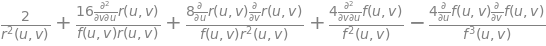

In [21]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [22]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                  ⎛            2                                   ⎞                
⎢                                                                  ⎜           ∂             ∂           ∂          ⎟                
⎢                                                                2⋅⎜- f(u, v)⋅───(r(u, v)) + ──(f(u, v))⋅──(r(u, v))⎟                
⎢                                                                  ⎜            2            ∂u          ∂u         ⎟                
⎢                                                                  ⎝          ∂u                                    ⎠                
⎢                                                                ────────────────────────────────────────────────────                
⎢                                                                                  f(u, v)⋅r(u, v)                                   
⎢                                                             

In [23]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢     ⎡                                                               2                                          ⎤                   
⎢     ⎢                                                              ∂              ∂           ∂                ⎥                   
⎢     ⎢                                                  - f(u, v)⋅─────(f(u, v)) + ──(f(u, v))⋅──(f(u, v))      ⎥                   
⎢     ⎢                                                       

In [24]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()

⎡                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                             